<a href="https://colab.research.google.com/github/ocalzada/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/calzada%2C_oscar_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [2]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

persons_data_url = 'https://raw.githubusercontent.com/ocalzada/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

import pandas as pd

persons_data = pd.read_csv(persons_data_url)
print(persons_data.shape)
persons_data.head()


(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [3]:
persons_data.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [4]:
persons_data.count()

Unnamed: 0       1200
age              1200
weight           1200
exercise_time    1200
dtype: int64

In [0]:
pd.crosstab(persons_data['exercise_time'], persons_data['weight'])

In [0]:
?pd.cut

In [6]:
!pip install pandas==0.23.4

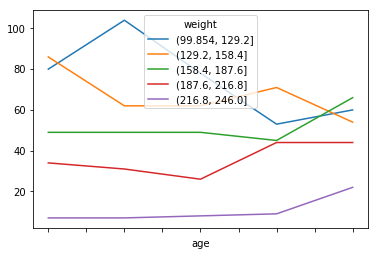

In [42]:

age_bins = pd.cut(persons_data['age'], 5)
weight_bins = pd.cut(persons_data['weight'], 5)

age_weight = pd.crosstab(age_bins, weight_bins)

age_weight.plot();
#people's weight seems to been coalescing 

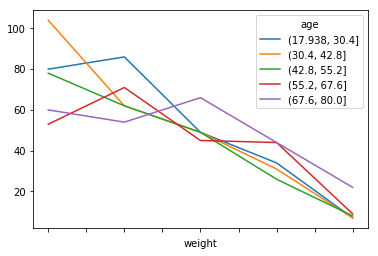

In [22]:
weight_age = pd.crosstab(weight_bins, age_bins)

weight_age.plot();

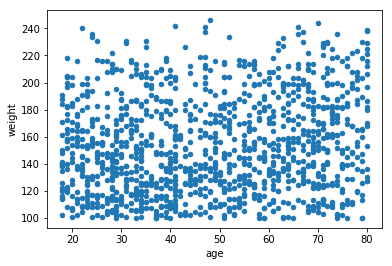

In [24]:
persons_data.plot.scatter('age', 'weight');

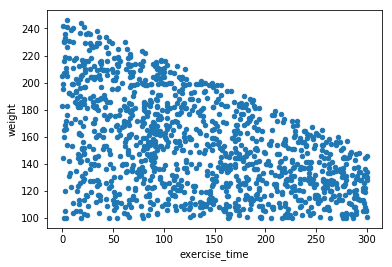

In [25]:
persons_data.plot.scatter('exercise_time', 'weight');
# heavier people spend less time exercising

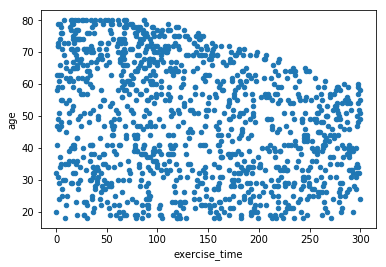

In [27]:
persons_data.plot.scatter('exercise_time', 'age');
# there are no 70+ year olds that exercise > 250 mins/week in this database

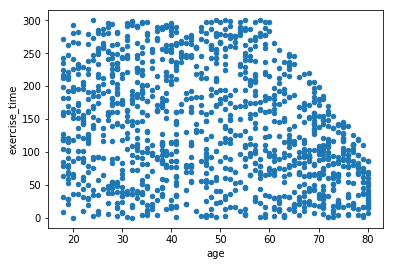

In [28]:
persons_data.plot.scatter('age', 'exercise_time');
#as people grow older in age, they spend less time exercising

In [38]:
persons_data.dtypes

Unnamed: 0       int64
age              int64
weight           int64
exercise_time    int64
dtype: object

In [45]:
print(persons_data.age.median())
print(persons_data.weight.median())
print(persons_data.exercise_time.median())


48.0
149.0
122.0


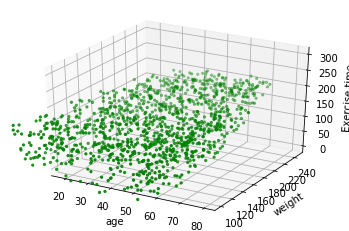

In [68]:
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
import numpy as np

fig = plt.figure()
ax = plt.axes(projection="3d")

x = persons_data['age']
y = persons_data['weight']
z = persons_data['exercise_time']
ax.scatter3D(x, y, z, s=5, c='g', zdir='y')
ax.set_xlabel('age')
ax.set_ylabel('weight')
ax.set_zlabel('Exercise time')
plt.show()

?ax.scatter3D


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. The variable types in the original dataset are all continuous, for our purposes. Age, for example, is any real value (within an interval of possible human ages). So, is weight (lbs) and time (minutes). However, when we "binned" these values (e.g. age and weight), we converted these continuous variables into discrete intervals.

2. Correlations: as people grow older in age, they spend less time exercising; heavier people spend less time exercising; according to this database, there's really no correlation between weight and age.
3. It makes sense that as people grow older in age, they exercise less. This is a plausible correlation. It might also be probable that heavier people spend less time exercising, because they are heavier (sort of in a positive feedback loop), however, this is likely my own bias. Perhaps, heavier people are more likely to have other co-morbidities that better explains why they exercise less. Maybe they are more likely to suffer from a heart condition that prohibits them from long-term cardio exacerbation. In concludion, weight and exercise_time might, indeed, be a spurious correlation.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)